In [1]:
import sys
import pandas as pd
import seaborn as sns
from numpy import percentile
from utils import run
from distributions import Uniform, Zipfian
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathRemote
from pygav.data import lineplot, barplot, relplot
from pygav.utils import Timer
from utils import run

def measure_throughput_latency_writes(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    writes_per_secs = list(range(10_000, 100_000, 10_000))
    # writes_per_secs = list(range(1_000, 20_000, 1_000))

    for writes_per_sec in writes_per_secs:
        latencies = []
        for i in range(seconds):
            # pick key/values to write
            with Timer() as latency:
                for _ in range(writes_per_sec):
                    db[keys_set[next(distro)]] = vals_set[next(distro)]
            latency = float(latency)
            avg_latency = latency / writes_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50) * 1000000, 'writes_per_sec': writes_per_sec/1000, 'distribution': 'uniform'})
        res.append({'metric': '95p', 'value': percentile(latencies, 95) * 1000000, 'writes_per_sec': writes_per_sec/1000, 'distribution': 'uniform'})

    return res


df = run(
    [5], [5], [100_000], [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'remote': [None]
    },
    {
        'max_runs_per_level': [10],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'remote': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'compaction': [False],
        'remote': [None]
    }],
    [measure_throughput_latency_writes], {}
)

def measure_throughput_latency_writes(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    writes_per_secs = list(range(10_000, 100_000, 10_000))
    # writes_per_secs = list(range(1_000, 20_000, 1_000))

    for writes_per_sec in writes_per_secs:
        latencies = []
        for i in range(seconds):
            # pick key/values to write
            with Timer() as latency:
                for _ in range(writes_per_sec):
                    db[keys_set[next(distro)]] = vals_set[next(distro)]
            latency = float(latency)
            avg_latency = latency / writes_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50) * 1000000, 'writes_per_sec': writes_per_sec/1000, 'distribution': 'zipfian'})
        res.append({'metric': '95p', 'value': percentile(latencies, 95) * 1000000, 'writes_per_sec': writes_per_sec/1000, 'distribution': 'zipfian'})

    return res


df2 = run(
    [5], [5], [100_000], [0],
    [Zipfian], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'remote': [None]
    },
    {
        'max_runs_per_level': [10],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'remote': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'compaction': [False],
        'remote': [None]
    }],
    [measure_throughput_latency_writes], {}
)


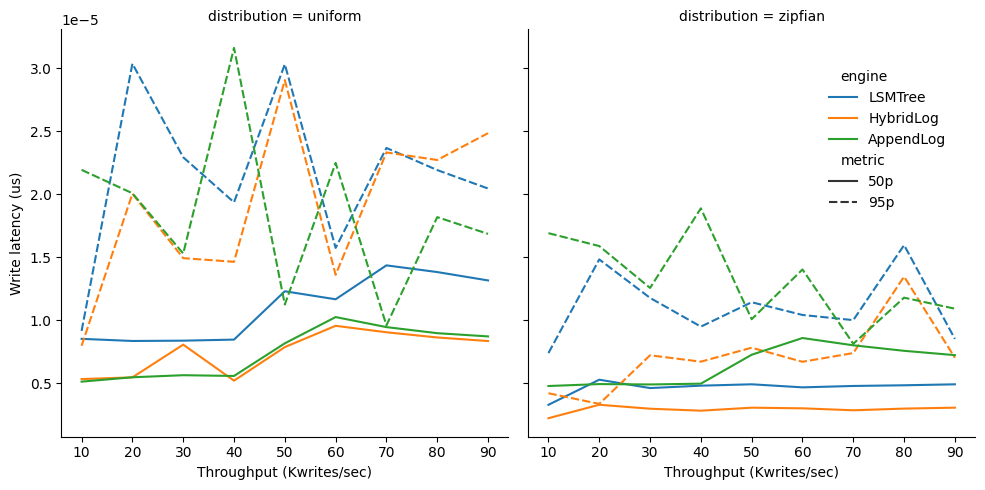

In [2]:
data = df[['writes_per_sec', 'metric', 'value', 'engine', 'distribution']]
data = data[data['metric'].isin(['50p', '95p'])]
# data['value'] = data['value'] * 1000000

data2 = df2[['writes_per_sec', 'metric', 'value', 'engine', 'distribution']]
data2 = data2[data2['metric'].isin(['50p', '95p'])]
# data2['value'] = data2['value'] * 1000000

data3 = pd.concat([df, df2], ignore_index=True)

plot = sns.relplot(data=data3, x='writes_per_sec', y='value', col='distribution',
            hue='engine', style='metric', kind='line')
plot.set_xlabels('Throughput (Kwrites/sec)')
plot.set_ylabels('Write latency (us)')
plot._legend.set_bbox_to_anchor((0.85, 0.7))
plot.savefig('write-throughput.pdf')

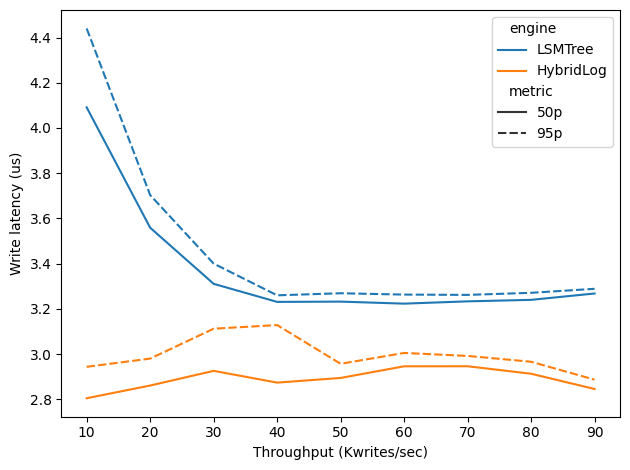

In [4]:
import sys
from numpy import percentile
from utils import run
from distributions import Uniform, Zipfian
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathRemote
from pygav.data import lineplot, barplot, relplot
from pygav.utils import Timer
from utils import run


def measure_throughput_latency_writes(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    writes_per_secs = list(range(10_000, 100_000, 10_000))
    # writes_per_secs = list(range(1_000, 20_000, 1_000))

    for writes_per_sec in writes_per_secs:
        latencies = []
        for i in range(seconds):
            # pick key/values to write
            with Timer() as latency:
                for _ in range(writes_per_sec):
                    db[keys_set[next(distro)]] = vals_set[next(distro)]
            latency = float(latency)
            avg_latency = latency / writes_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50), 'writes_per_sec': writes_per_sec/1000})
        res.append({'metric': '95p', 'value': percentile(latencies, 95), 'writes_per_sec': writes_per_sec/1000})

    return res


df = run(
    [5], [5], [100_000], [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [1_000_000],
        'remote': [None]
    },
    {
        'max_runs_per_level': [10],
        'ro_lag_interval': [100_000],
        'flush_interval': [100_000],
        'hash_index': ['dict'],
        'remote': [None]
    }],
    [measure_throughput_latency_writes], {}
)

data = df[['writes_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '95p'])]
data['value'] = data['value'] * 1000000

lineplot(data=data, x='writes_per_sec', y='value', hue='engine', style='metric',
         filename='write-throughput-fit-mem.pdf', xlabel='Throughput (Kwrites/sec)',
         ylabel='Write latency (us)')

#fit mem - uniform

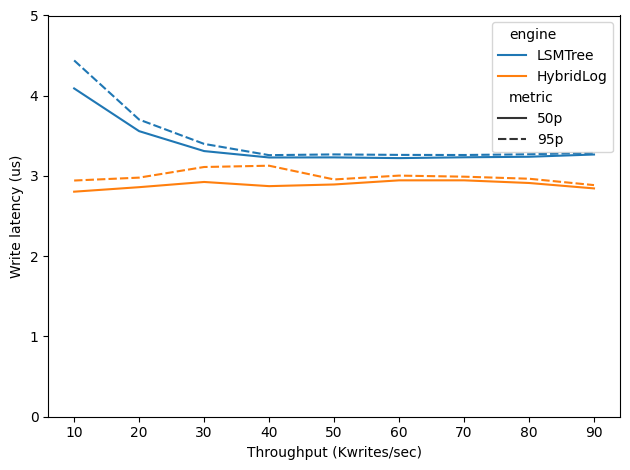

In [5]:
lineplot(data=data, x='writes_per_sec', y='value', hue='engine', style='metric',
         filename='write-throughput-fit-mem.pdf', xlabel='Throughput (Kwrites/sec)',
         ylabel='Write latency (us)', ylim=(0, 5))